# Implementing simple Logistic Regression model using Python

## Introduction to Logistic Regression 

The advantage that logistic regression has from other simple classifiers such as perceptron and SVMs is that it outputs probabilistic results, which is useful if you're working with classes that are not completely liearly separable. For example: Linear perceptron would classify a sample __x__ as either class 0 or 1. However, Logistic regression would result an output that looks like this: the probability that sample __x__ might belong to class 0 is 80% and class 1 is 20% etc.
One thing you should note is that, in spite of its name logistic regression is a classifier and NOT a regression model.

### Why study Logistic Regression?

Logistic regression is important to learn because of following reasons:
  - It provides probabilistic idea to classification problems
  - It's a binary version of a Softmax classifier (which is used widely in deep learning algorithms)
  - Logistic regression's logistic function can be used in many neural networks.

### The intuition and conditional probabilities of Logistic regression

Let's first assume that some data __x__ has a probability of P to belong to a class 0 (y = 0) when given weights __w__. We would write the conditional probability as,  $$P(y=0|\textbf{x};\textbf{w})$$ Then we introduce the _odds ratio_ which can be written as, $$\frac{P(y=0|\textbf{x};\textbf{w})}{1-P(y=0|\textbf{x};\textbf{w})}$$ Basically, what the odds ratio does is that it computes the quantity of odds in favor of particular event, which in this case is the probability that __x__ might belong to class 0. 

We can then define the __logit__ function. Which is just the natural logarithm of the odds ratio. $$logit(P) = log \frac{P(y=0|\textbf{x};\textbf{w})}{1-P(y=0|\textbf{x};\textbf{w})}$$
Let's look plot its graphs using the matplotlib module to get a better understanding.

In [1]:
# Import the modules
import numpy as np
import matplotlib.pyplot as plt

# Probabilities between 0 to 1
p = np.arange(0.01, 1, 0.01)

# Odds ratio function
def odds_ratio(p):
    return p/(1-p)

# Logit function
def logit(p):
    return np.log(np.clip(odds_ratio(p), -250, 250))

# Plotting the odds ratio and logit functions
plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.plot(p, odds_ratio(p))
plt.xlabel("Probability")
plt.ylabel("Odds ratio")

plt.subplot(122)
plt.plot(p, logit(p))
plt.xlabel("Probability")
plt.ylabel("Logit")

plt.show()

<Figure size 1000x400 with 2 Axes>

As we can see from the above graph, the logit function maps probability domain to a domain where we can interpret the probabilities below 0.5 as negative numbers and above 0.5 as positive numbers.  

We can then invert the logit function to get the sigmoid function, $$P(y=0|\textbf{x};\textbf{w}) = \frac{1}{1+e^{logit(P)}}$$

Since the definition of machine learning model hypothesis $z$ is written as $z = w^{T}x$ and can take any real value, we can substitute $logit(P)$ with our hypothesis $z$. Then, we finally get the __Sigmoid function__, $$P(y=0|\textbf{x};\textbf{w}) = \frac{1}{1+e^{-z}}$$

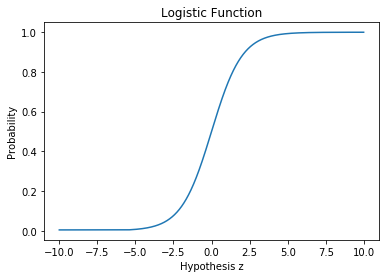

In [2]:
z = np.arange(-10, 10, 0.01)

# The sigmoid function
def sigmoid(z):
    return 1/(1+np.clip(np.exp(-z), -250, 250))

# Plotting the sigmoid function
plt.plot(z, sigmoid(z))
plt.title("Logistic Function")
plt.xlabel("Hypothesis z")
plt.ylabel("Probability")
plt.show()

The Sigmoid function take any real input and outputs a probability value between 0 to 1. Basically, the sigmoid function maps the hypothesis domain into a probabilistic domain.

## Logistic regression model

Let's see how a logistic regression works. 

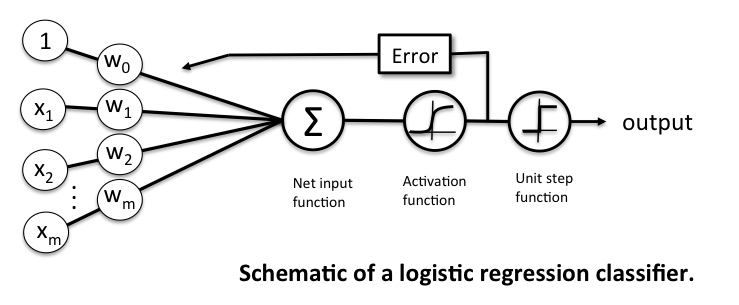

In [3]:
from IPython.display import Image
Image(filename='images/logistic_regression_schematic.png', width=500)

To explain simply, what logistic regression does is that, <br> 
first, it computes the net sum $z$, <br>
then it feed $z$ through the activation function, which is the Sigmoid function, to map the net sum z into a probabilistic domain h or hypothesis $h$ of each sample. <br>
Lastly, it compute the error and cost and feeds it to the gradient descent algorithm to optimize the weights. <br>

### The hypothesis $h$

Given sample data $\textbf{x} = \{x^{(1)}, x^{(2)}, x^{(3)}, ..., x^{(m)}\}$ with $x^{(i)} \in \Re^{n}$ where $m$ is the number of samples and n is the number of features. <br>
and weights $\textbf{w} \in \Re^{(n+1)}$, <br>
the net sum $z$ can be written as follows, $$z=\textbf{w}^T \textbf{x}=w_0x_0+w_1x_1+...+w_nx_n$$ <br>
where, $x_0$ is the bias. <br>
And our hypothesis can be written as $$h=\phi(z)$$ <br>
where, $\phi$ is the activation function or the sigmoid function. <br>
Let's take some dummy data and weights to what the hypothesis is about.

Let's assume we have 6 samples $\textbf{x}$ with two features and its corresponding classes $\textbf{y}$ is as follows,

In [4]:
x = np.array([[1, 1], [1, 2], [1, 4], [4, 1], [4, 3], [4, 4]])
y = np.array([0, 0, 0, 1, 1, 1])

And its scatter plot is as follows,

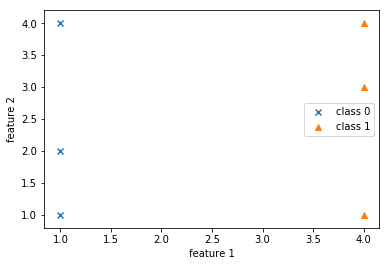

In [5]:
plt.scatter(x[y==0, 0], x[y==0, 1], label = "class 0", marker = "x")
plt.scatter(x[y==1, 0], x[y==1, 1], label = "class 1", marker = "^")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

Also, let's assume that our weight is as follows,

In [6]:
w = np.array([0.1, 0.2, 0.3])
print("Weights: ")
print(w)

Weights: 
[0.1 0.2 0.3]


Let's compute the hypothesis h to understand how sigmoid function output conditional probabilities. <br>
First let's compute the net input $z$,

In [7]:
z = x.dot(w[1:]) + w[0]
print("Net sum of each sample is:")
print(z)

Net sum of each sample is:
[0.6 0.9 1.5 1.2 1.8 2.1]


To compute our hypothesis we then feed our net sum z into the sigmoid function,

In [8]:
h = sigmoid(z)
print("The hypothesis for each sample is:")
print(h)

The hypothesis for each sample is:
[0.64565631 0.7109495  0.81757448 0.76852478 0.85814894 0.89090318]


As we can see, all values are between 0 to 1. We can interpret these as the samples $x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}$ belonging to class 1.

We can then simplify this as, 
$$\widehat{y} = \left\{ \begin{array}{rcl}
{1} & \mbox{if}
& \phi(z) \geq 0.5 \\ 0 & \mbox{otherwise} &
\end{array}\right.
$$
If we look at the plot of the sigmoid function graph, this is equivalent to,
$$\widehat{y} = \left\{ \begin{array}{rcl}
{1} & \mbox{if}
& z \geq 0 \\ 0 & \mbox{otherwise} &
\end{array}\right.
$$
where $\widehat{y}$ is the predicted class.

Finally, using the above equation we can compute the predicted labels as follows:

In [9]:
# Compute the predicted labels
y_hat = (z >= 0) * 1
print("y_hat = ", y_hat)

y_hat =  [1 1 1 1 1 1]


Given weights $w=\{0.1, 0.2, 0.3\}$ the model predicts that all the dummy samples belongs to class 1. <br>
In order to correctly predict class labels, we are going to tune the weights using gradient descent algorithm.

### Training the weights

We can calculate the probabilities and predict the class labels using above function. Now we are going to train our weights so that it can correctly predict class labels.

#### The cost function

The cost function is used to quantify the amount weights are incorrectly classifying.
The cost function of the logistic regression is called the __log-likelyhood function__. The formula is a follows:
$$J(\textbf{w})=-\sum_i ( y^{(i)} log(\phi (z^{(i)}))+(1-y^{(i)})log(1-\phi (z^{(i)})))$$
We can see that the first term becomes 0 if $y=0$, and the second term becomes zero if $y=1$:
$$J(\phi(z), y;\textbf{w}) = \left\{ \begin{array}{rcl}
{-log(\phi(z))} & \mbox{if} & y=1 \\ 
-log(1-\phi(z)) & \mbox{if} & y=0
\end{array}\right.
$$
Basically, what it does is that when we get a wrong prediction the cost increases and when we get a correct prediction the cost decreases.
Let's calculate the cost of our dummy data and weights to see how much our prediction was wrong.

In [10]:
def compute_cost(z):
    return np.sum(-y*(np.log(sigmoid(z))) - ((1 - y)*(np.log(1 - sigmoid(z)))))
print("Total cost:", compute_cost(z))

Total cost: 4.511834704244585


Our cost was equal to 4.51. We can then use this to update our weights so that the hypothesis gives as less cost as possible.

#### Updating the weights

In our logistic regression model, we will use gradient descent algorithm to update our weights so that our models hypothesis gives as low cost as possible.
The algorithm for gradient descent is as follows:
$$\textbf{w} = \textbf{w} -\eta \Delta J(\textbf{w})$$
where, $\eta$ is the learning rate and $\Delta J(\textbf{w})$ is the derivative of the cost function. 

The idea behind gradient descent is that by calculating the _gradient_ or the _slope_ of the cost function, we can get a general idea of which way or direction is optimal for reducing the cost. We can imagine the cost function as a valley, the weights as a position, $\Delta J(\textbf{w})$ as the direction and $\eta$ as the size of our step. <br>
One way to understand gradient descent is to imagine you're on top of a hill blindfolded and you have find your way down without looking. By taking a small step you can get a general idea which way is down by feeling the slope of the hill. The gradient descent algorithm works the same way.

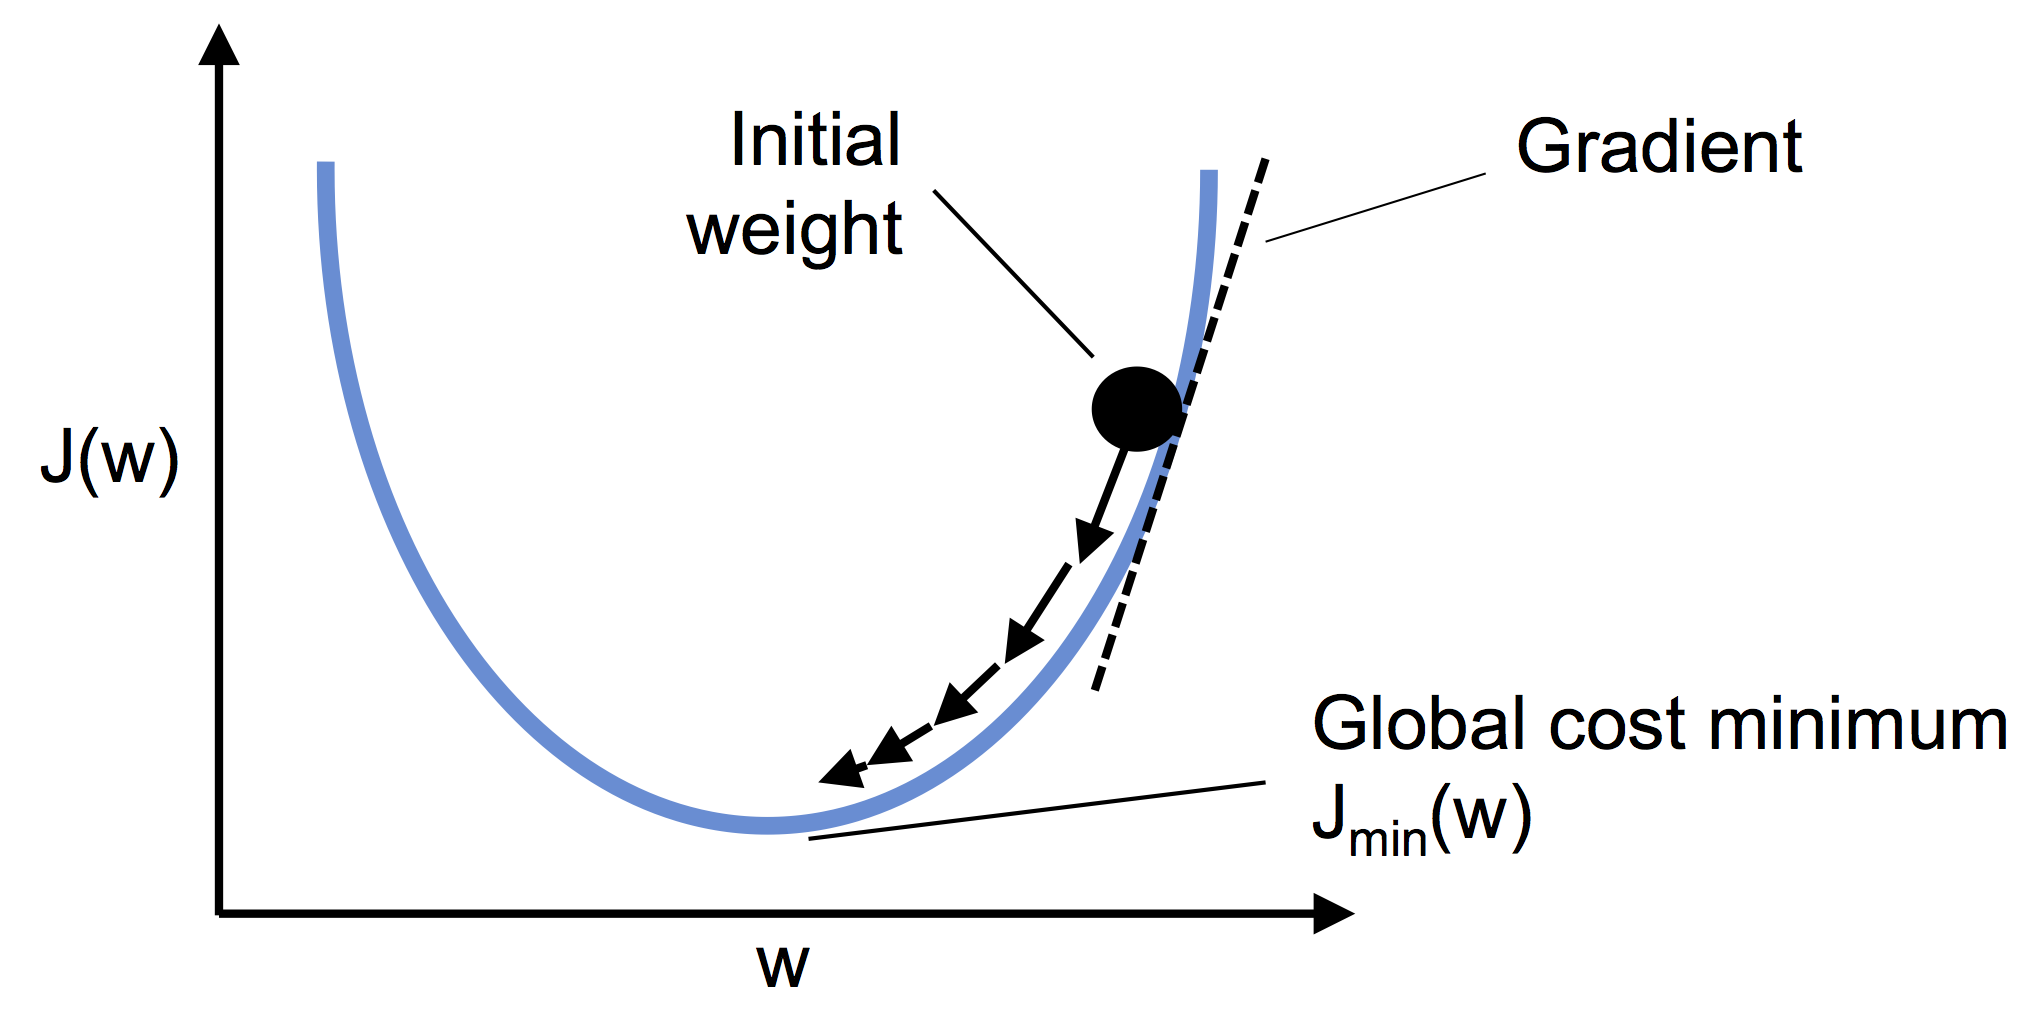

In [11]:
Image(filename='images/gradient_descent.png', width=500)

The derivative of the cost function $J$ is as follows,
$$\Delta J_j({\textbf{w}}) = -\sum_i (y^{(i)} - \phi(z^{(i)}))x^{(i)}_j$$
We're prove the derivative of $J$ however if you're good at calculus it's a nice problem to handle after dinner.

#### Training epochs and convergence

Now we can update the weights using the gradient descent algorithm, however, there's a tiny problem. We can continueosly take a small step down the hill but we don't have any means to stop. <br>
We can define the amount of steps we take or iterations or _epochs_ we can stop at the general local minima of our cost function. Also, we can give our model a condition to stop such as: if the difference between the cost in the last two iterations is smaller than $\epsilon$ (for example, $\epsilon = 10^{-4}$) then we can stop training etc. 

#### The training

Now let's train a logistic regression model using our dummy samples using the the knowledge we have so far. 

In [12]:
# Number of iterations
epoch = 100

# Learning rate
learning_rate = 0.1

# Cost array
cost_array = []

# Initialize the weights
w = np.array([0, 0, 0], dtype = float)

# Training
for _ in range(epoch):
    # Dot product of z (= w1*x1 + w2*x2 + ... + wn*xn) + w0
    z = np.dot(x, w[1:]) + w[0]
    
    # Cost function (Cross Entropy Function)
    cost = compute_cost(z)
    cost_array.append(cost)
    
    # Weight update 
    w[0] -= learning_rate * np.sum(sigmoid(z) - y)
    w[1:] -= learning_rate * (np.dot((sigmoid(z) - y), x))
        
    # Convergence condition
#    if(_ > 2):
#        if (cost_array[-2] - cost_array[-1]) < 0.001:
#            break
trained_weights = w
print("Learned weights: ", trained_weights)

Learned weights:  [-3.05461965  2.72595871 -1.26269472]


Now let's see if we can correctly predict our dummy data class label using our trained weights.

In [13]:
z = x.dot(w[1:]) + w[0]
print("y_hat = ", (z >= 0) * 1)

y_hat =  [0 0 0 1 1 1]


As we can see from the result above, our trained weights successfully predicted our dummy data.
Let's plot the decision boundary to see how our weights decide class labels.

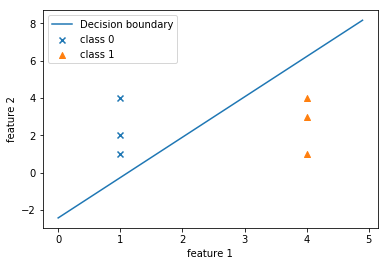

In [14]:
# Plot the data
plt.scatter(x[y==0, 0], x[y==0, 1], label = "class 0", marker = "x")
plt.scatter(x[y==1, 0], x[y==1, 1], label = "class 1", marker = "^")

# Plot decision boundary
t = np.arange(0, 5, 0.1)
plt.plot(t, (-w[0] - w[1] * t)/w[2], label = "Decision boundary")

# Graph axis
plt.xlabel("feature 1")
plt.ylabel("feature 2")

plt.legend()
plt.show()

We can see that our decision boundary is correctly classifying two classes. <br>
Let's look at our cost function to see how much it changes during every iteration.

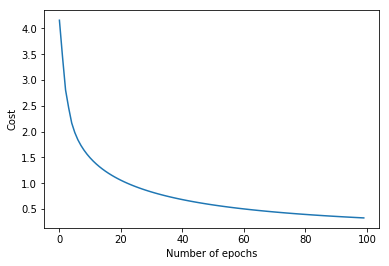

In [15]:
plt.plot(range(len(cost_array)), cost_array)
plt.xlabel("Number of epochs")
plt.ylabel("Cost")
plt.show()

We can see that cost decreases at every iteration. <br>
Since machine learning algorithms compute so many vectors and matrices, some implementations correctly classify samples even when there's a bug in the implementation. Checking the cost-epoch graph is used widely to debug machine learning implementations, even state-of-the-art deep learning architectures. Generally, the cost of your machine learning implementation should be similar to the above graph. Here's a nice picture that shows how to how to choose a learning rate.

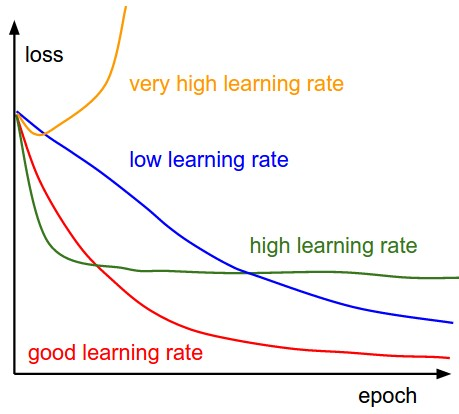

In [16]:
Image(filename='images/learningrates.jpeg')

This concludes my tutorial on Logistic Regression. I hope you learned something useful. 
If you have any suggestions, comments or if there's error here please feel free to let me know.

### Sources
  - Sebastian Raschka & Vahid Mirjalili. _Python Machine Learning Second Edition_, Packt Publishing, 2017. Print.
  - Andrew Ng, _Machine Learning by Stanford University_. Retrieved from https://www.coursera.org/learn/machine-learning/